In [2]:
# Python Project 2
# Portion by Alexander Herring
# Foregin aid data from US AID, https://explorer.usaid.gov/data.html#tab-data-download
# GDP data from World Bank, https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?view=chart

#Question 1: What are the high level U.S. foreign aid spending trends?
#Historic Trends in US Foreign Aid spending
#150 account levels compared to overall US budget
#Annual spending levels from the 150 account
#Annual spending levels by agency from 150 account
#Annual spending levels by category from 150 account
#Military vs. economic spending
#Recipient countries (ranked)

In [16]:
# Import packages and choose settings

import datetime as dt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
pd.options.display.float_format = "${:,.2f}".format
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from functools import partial
from numbers import Number

In [4]:
# Import the data

us_for_aid = pd.read_csv("C:\\Users\\Alex\\Desktop\\Python Project 2\\us_foreign_aid_complete.csv", index_col = False)
us_for_aid_df = pd.DataFrame(us_for_aid)
gdp_world = pd.read_csv("C:\\Users\\Alex\\Desktop\\Python Project 2\\API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv", skiprows = 4, index_col = False)
gdp_world_df = pd.DataFrame(gdp_world)
print(gdp_world_df)
gdp_world_df.head()
fhfawb_pickle = pd.read_pickle("C:\\Users\\Alex\\Desktop\\Python Project 2\\fhfawb.pickle")
#print(fhfawb_pickle.type())

fhfawb_pickle_df = pd.DataFrame(fhfawb_pickle)

print(fhfawb_pickle_df)
fhfawb_pickle_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


                                          Country Name Country Code  \
0                                                Aruba          ABW   
1                                          Afghanistan          AFG   
2                                               Angola          AGO   
3                                              Albania          ALB   
4                                              Andorra          AND   
5                                           Arab World          ARB   
6                                 United Arab Emirates          ARE   
7                                            Argentina          ARG   
8                                              Armenia          ARM   
9                                       American Samoa          ASM   
10                                 Antigua and Barbuda          ATG   
11                                           Australia          AUS   
12                                             Austria          AUT   
13    

        FH_Score  year      country FH_value       date     gdppc  gini   nat  \
0             PR  1972  Afghanistan        4 1972-01-01      $nan  $nan $0.40   
1             PR  1972  Afghanistan        4 1972-01-01      $nan  $nan $0.40   
2             PR  1972  Afghanistan        4 1972-01-01      $nan  $nan $0.40   
3             PR  1972  Afghanistan        4 1972-01-01      $nan  $nan $0.40   
4             PR  1972  Afghanistan        4 1972-01-01      $nan  $nan $0.40   
5             PR  1972  Afghanistan        4 1972-01-01      $nan  $nan $0.40   
6             PR  1972  Afghanistan        4 1972-01-01      $nan  $nan $0.40   
7             CL  1972  Afghanistan        5 1972-01-01      $nan  $nan $0.40   
8             CL  1972  Afghanistan        5 1972-01-01      $nan  $nan $0.40   
9             CL  1972  Afghanistan        5 1972-01-01      $nan  $nan $0.40   
10            CL  1972  Afghanistan        5 1972-01-01      $nan  $nan $0.40   
11            CL  1972  Afgh

,FH_Score,year,country,FH_value,date,gdppc,gini,nat,pop,voice,...,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,current_amount,constant_amount,USG_sector_id,USG_sector_name,framework,submission_id
0,PR,1972,Afghanistan,4,1972-01-01,$nan,$nan,$0.40,"$11,721,940.00",$nan,...,NaN,NaN,$2.00,Obligations,"$18,600,000.00","$84,188,676.00",$25.00,Macroeconomic Foundation for Growth,NaN,$1.00
1,PR,1972,Afghanistan,4,1972-01-01,$nan,$nan,$0.40,"$11,721,940.00",$nan,...,NaN,NaN,$2.00,Obligations,"$6,600,000.00","$29,873,401.00",$25.00,Macroeconomic Foundation for Growth,NaN,$1.00
2,PR,1972,Afghanistan,4,1972-01-01,$nan,$nan,$0.40,"$11,721,940.00",$nan,...,NaN,NaN,$2.00,Obligations,"$6,100,000.00","$27,610,265.00",$25.00,Macroeconomic Foundation for Growth,NaN,$1.00
3,PR,1972,Afghanistan,4,1972-01-01,$nan,$nan,$0.40,"$11,721,940.00",$nan,...,NaN,NaN,$2.00,Obligations,"$3,000,000.00","$13,578,819.00",$25.00,Macroeconomic Foundation for Growth,NaN,$1.00
4,PR,1972,Afghanistan,4,1972-01-01,$nan,$nan,$0.40,"$11,721,940.00",$nan,...,NaN,NaN,$2.00,Obligations,"$1,300,000.00","$5,884,155.00",$25.00,Macroeconomic Foundation for Growth,NaN,$1.00


In [5]:
# Clean data

us_for_aid_df["constant_amount"] = us_for_aid_df["constant_amount"].astype(float)
us_for_aid_df["fiscal_year"] = us_for_aid_df["fiscal_year"].astype(str)
# Relabeling years coded as "1976tq" to 1976
us_for_aid_df_adj = us_for_aid_df.copy()
us_for_aid_df_adj.loc[:, "fiscal_year"].replace("1976tq", "1976", inplace=True)
us_for_aid_df_adj["fiscal_year"] = us_for_aid_df_adj["fiscal_year"].astype(int)
us_for_aid_df_adj["fiscal_year"] = pd.to_datetime(us_for_aid_df_adj["fiscal_year"], format='%Y')

#gdp_world_us = pd.DataFrame(gdp_world["Country Code" == "USA"])
#gdp_world_df["Country Code"] == "USA"
gdp_us_df = gdp_world_df.loc[gdp_world_df["Country Code"].str.contains(r"USA"), ].copy()
print(gdp_us_df)

# Get summary of data
#print(us_for_aid_df_adj.head())
#print(us_for_aid_df_adj)
#us_for_aid_df_adj.fiscal_year.unique()
# Track high-level trends

      Country Name Country Code     Indicator Name  Indicator Code  \
249  United States          USA  GDP (current US$)  NY.GDP.MKTP.CD   

                   1960                1961                1962  \
249 $543,300,000,000.00 $563,300,000,000.00 $605,100,000,000.00   

                   1963                1964                1965     ...       \
249 $638,600,000,000.00 $685,800,000,000.00 $743,700,000,000.00     ...        

                      2009                   2010                   2011  \
249 $14,418,739,000,000.00 $14,964,372,000,000.00 $15,517,926,000,000.00   

                      2012                   2013                   2014  \
249 $16,155,255,000,000.00 $16,691,517,000,000.00 $17,393,103,000,000.00   

                      2015                   2016  2017  Unnamed: 62  
249 $18,036,648,000,000.00 $18,569,100,000,000.00  $nan         $nan  

[1 rows x 63 columns]


In [6]:
# Highest-level dataframe information

us_for_aid_df_adj.columns

Index(['country_id', 'country_code', 'country_name', 'region_id',
       'region_name', 'income_group_id', 'income_group_name',
       'income_group_acronym', 'implementing_agency_id',
       'implementing_agency_acronym', 'implementing_agency_name',
       'implementing_subagency_id', 'subagency_acronym', 'subagency_name',
       'channel_category_id', 'channel_category_name',
       'channel_subcategory_id', 'channel_subcategory_name', 'channel_id',
       'channel_name', 'dac_category_id', 'dac_category_name',
       'dac_sector_code', 'dac_sector_name', 'dac_purpose_code',
       'dac_purpose_name', 'funding_account_id', 'funding_account_name',
       'funding_agency_id', 'funding_agency_name', 'funding_agency_acronym',
       'assistance_category_id', 'assistance_category_name',
       'aid_type_group_id', 'aid_type_group_name', 'activity_id',
       'activity_name', 'activity_project_number', 'activity_start_date',
       'activity_end_date', 'transaction_type_id', 'transaction_t

In [7]:
us_for_aid_df_adj.shape

(901977, 48)

In [18]:
# Function code I found to format as percent

def as_percent(v, precision='0.2'):  
    """Convert number to percentage string."""
    if isinstance(v, Number):
        return "{{:{}%}}".format(precision).format(v)
    else:
        raise TypeError("Numeric type required")

In [8]:
# Aid Received by Region
region_const_amt = pd.DataFrame(us_for_aid_df_adj.groupby("region_name").constant_amount.sum().sort_values(ascending = False))
region_const_amt.reset_index(inplace = True)
region_const_amt.columns = ["Region Name", "Aid in Contsant Dollars"]

region_const_amt.head(10)

#print(region_const_amt.columns)
#region_const_amt["constant_amount"]
#type(region_const_amt["constant_amount"])
#type(region_const_amt["constant_amount"][2])




,Region Name,Aid in Contsant Dollars
0,Middle East and North Africa,"$727,287,462,690.00"
1,Europe and Eurasia,"$580,471,010,787.00"
2,World,"$533,062,973,692.00"
3,East Asia and Oceania,"$416,958,627,314.00"
4,South and Central Asia,"$402,860,265,873.00"
5,Sub-Saharan Africa,"$331,028,159,679.00"
6,Western Hemisphere,"$221,937,873,991.00"


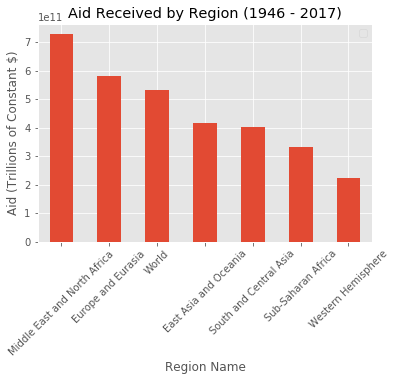

In [9]:
fig = region_const_amt.plot.bar(x = "Region Name", y = "Aid in Contsant Dollars")
plt.title("Aid Received by Region (1946 - 2017)")
plt.xlabel("Region Name")
plt.xticks(rotation = 45)
plt.ylabel("Aid (Trillions of Constant $)")
plt.legend("")
plt.show()
#plt.tick_params(labelsize=14)
#format()
#fig.yaxis.set_major_formatter(FormatStrFormatter('%.0e'))

#ax.yaxis.set_major_formatter(FormatStrFormatter('.2f'))
#set_major_formatter(mtick.FormatStrFormatter('%.0e')) 

#ax.get_yaxis().set_major_formatter(
    #matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x) * 1000, ',')))

In [10]:
# Donations Received by Country
country_const_amt = pd.DataFrame(us_for_aid_df_adj.groupby("country_name").constant_amount.sum().sort_values(ascending = False))

#country_const_amt.rename(columns={"country_name": "Country Name"}, inplace=True)

country_const_amt.reset_index(inplace = True)
country_const_amt.columns = ["Country Name", "Aid in Contsant Dollars"]
country_const_amt.head(10)

#fig = country_const_amt.plot.bar(x = "country_name", y = "constant_amount")
#plt.title("Donations Received by Country")
#plt.xlabel("Region Name")
#plt.xticks(rotation = 45)
#plt.ylabel("Amount (Constant $)")
#plt.legend("")
#plt.tick_params(labelsize=14)
#format()
#fig.yaxis.set_major_formatter(FormatStrFormatter('%.0e'))

#ax.yaxis.set_major_formatter(FormatStrFormatter('.2f'))
#set_major_formatter(mtick.FormatStrFormatter('%.0e')) 

#ax.get_yaxis().set_major_formatter(
    #matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x) * 1000, ',')))



# maybe low, middle, high income countries


#add yoy here, useful for graph

,Country Name,Aid in Contsant Dollars
0,World,"$507,538,246,048.00"
1,Israel,"$273,907,061,746.00"
2,Afghanistan,"$208,858,862,401.00"
3,Egypt,"$164,260,077,581.00"
4,Iraq,"$143,146,172,940.00"
5,Vietnam (former South),"$121,379,497,371.00"
6,Korea Republic,"$79,972,851,743.00"
7,Pakistan,"$79,177,016,069.00"
8,United Kingdom,"$73,672,609,328.00"
9,India,"$71,179,112,268.00"


In [11]:
# Donations Received by Year
year_const_amt = pd.DataFrame(us_for_aid_df_adj.groupby("fiscal_year").constant_amount.sum().sort_values(ascending = False))
year_const_amt.reset_index(inplace = True)
year_const_amt = year_const_amt.sort_values(by = "fiscal_year", ascending = False)
year_const_amt.columns = ["Year", "Aid in Contsant Dollars"]
year_const_amt.head(20)
#year_const_amt = year_const_amt.sort_values(by = "fiscal_year", ascending = True)

#year_const_amt["fiscal_year"] = mdates.date2num(year_const_amt["fiscal_year"].to_pydatetime())


#year_const_amt.sort_index(inplace = True, ascending = False)
#print(year_const_amt)



#fig, ax = plt.subplots()
#fig = year_const_amt.plot.bar(x = "fiscal_year", y = "constant_amount")
#plt.title("Donations Received by Year")
#plt.xlabel("Region Name")
#plt.xticks(rotation = 45)
#plt.ylabel("Amount (Constant $)")
#plt.legend("")
#plt.locator_params(axis='x', nticks=10)





#myLocator = plt.MultipleLocator(4)
#fig.xaxis.set_major_locator(myLocator)
#fig.xaxis_date() 
#fig.autofmt_xdate()
#plt.show()


#fig, ax = plt.subplots()
#ax.plot(year_const_amt["fiscal_year"], year_const_amt["constant_amount"])
#ax.xaxis_date()     # interpret the x-axis values as dates
#fig.autofmt_xdate() # make space for and rotate the x-axis tick labels
#plt.show()

,Year,Aid in Contsant Dollars
20,2017-01-01,"$42,956,942,659.00"
7,2016-01-01,"$94,861,916,152.00"
5,2015-01-01,"$97,256,512,607.00"
8,2014-01-01,"$86,379,601,030.00"
6,2013-01-01,"$95,654,851,269.00"
1,2012-01-01,"$102,204,936,149.00"
0,2011-01-01,"$103,854,284,297.00"
4,2010-01-01,"$99,601,451,691.00"
2,2009-01-01,"$101,506,402,048.00"
3,2008-01-01,"$99,988,680,940.00"


In [12]:
# Agency Funding Aid
agency_const_amt = pd.DataFrame(us_for_aid_df_adj.groupby("funding_agency_name").constant_amount.sum().sort_values(ascending = False))
agency_const_amt.reset_index(inplace = True)
agency_const_amt.columns = ["Agency Funding the Aid", "Aid in Contsant Dollars"]
agency_const_amt.head()
#print(agency_const_amt)

,Agency Funding the Aid,Aid in Contsant Dollars
0,U.S. Agency for International Development,"$1,051,522,363,801.00"
1,Department of Defense,"$773,145,770,324.00"
2,Department of State,"$315,244,267,992.00"
3,Department of Agriculture,"$289,128,915,466.00"
4,Unknown - Historical Greenbook,"$218,156,694,759.00"


In [19]:
# Category of Aid
aid_cat_const_amt = pd.DataFrame(us_for_aid_df_adj.groupby("assistance_category_name").constant_amount.sum().sort_values(ascending = False))
aid_cat_const_amt.reset_index(inplace = True)
aid_cat_const_amt.columns = ["Category of Aid", "Aid in Contsant Dollars"]
aid_cat_const_amt["Percent of Total"] = aid_cat_const_amt["Aid in Contsant Dollars"] / aid_cat_const_amt["Aid in Contsant Dollars"].sum()
aid_cat_const_amt["Percent of Total"] = aid_cat_const_amt["Percent of Total"].apply(as_percent) 
aid_cat_const_amt.head()

,Category of Aid,Aid in Contsant Dollars,Percent of Total
0,Economic,"$2,157,055,102,518.00",67.12%
1,Military,"$1,056,551,271,508.00",32.88%


In [ ]:
# Name for Aid
aid_name_const_amt = pd.DataFrame(us_for_aid_df_adj.groupby("activity_name").constant_amount.sum().sort_values(ascending = False))
aid_name_const_amt.reset_index(inplace = True)
aid_name_const_amt.columns = ["Activity Benefiting from Aid", "Aid in Contsant Dollars"]
aid_name_const_amt.head()

In [ ]:
# Track Transaction Types
transac_type_const_amt = us_for_aid_df.groupby("transaction_type_name").constant_amount.sum().sort_values(ascending = False)
transac_type_const_amt.columns = ["Aid Transaction Types", "Aid in Contsant Dollars"]
transac_type_const_amt.head()

# Graph

In [ ]:
# Track Transaction Type by Year
reduced_df = pd.DataFrame(us_for_aid_df_adj[["region_name", "country_name", "fiscal_year", "funding_agency_name", "assistance_category_name", "activity_name", "transaction_type_name", "constant_amount"]].copy())
reduced_df.reset_index(inplace = True)
print(reduced_df)

reduced_sums = us_for_aid_df.groupby(["country_name", "transaction_type_name", "fiscal_year"]).constant_amount.sum()
country_const_amt.reset_index(inplace = True)
reduced_sums.head(20)
reduced_sums

#mon_contrib_wide = mon_contrib.pivot(index='date', columns='cand_nm', values='contb_receipt_amt')
reduced_sums.plot()


#Yoy funding 

#bar charts by country, maybe region

# us budget or gdp, and have foreign aid as a proportion - break by military and non-military (pay attention to inflation)

#size of receiving country population - world bank

#look at from standpoint of years, trend analysis (trend line) - money by year or decade, perhaps by spending level or type

#area chart - kind in plot box, area